In [ ]:
###-----LYRICAL ATTRIBUTE ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
new_data = pd.read_csv('new_data.csv')
new_data2 = new_data #copy of orig dataset for the upcoming new vars to include
new_data2

,Unnamed: 0,song,year,artist,genre,lyrics,sex
0,0,my-elusive-dreams,1970,bobby-vinton,Pop,"You followed me to Texas,\nYou followed me to ...",M
1,1,baby-i-m-yours,1970,bobby-vinton,Pop,Baby I'm yours\nBaby I'm yours\nAnd I'll be yo...,M
2,2,raindrops-keep-fallin-on-my-head,1970,bobby-vinton,Pop,Raindrops keep falling on my head\nAnd just li...,M
3,3,god-only-knows,1970,beach-boys,Rock,I may not always love you\nBut long as there a...,M
4,4,their-hearts-were-full-of-spring,1970,beach-boys,Rock,There's a story told of a very gentle boy\nAnd...,M
...,...,...,...,...,...,...,...
119361,119361,country-ain-t-never-been-pretty,2015,cam,Other,Her high heels on the red carpet\nHer perfect ...,F
119362,119362,runaway-train,2015,cam,Other,I always knew that you were hiding something f...,F
119363,119363,want-it-all,2015,cam,Other,"Been a-sittin' 'round a coward, broken all tha...",F
119364,119364,pocket-full-of-keys,2015,dale-ann-bradley,Country,"He has one that locks the office,\nAnd there's...",F


In [3]:
#tokenization function (tokenize lyrics)
def tokenize_txt(txt):
    txt=re.sub("[^\w\s]", "", txt)
    tokens = txt.split()
    return tokens

In [4]:
#tokenizing lyrics
l_token = []
for lyric in new_data['lyrics']:
    l_token.append(tokenize_txt(lyric))
    
#putting it into the df
new_data2.insert(5, 'lyrics_tokenized', value=l_token)

In [5]:
#adding length of songs variable
song_len = []
for song in new_data2['lyrics_tokenized']:
    song_len.append(len(song))
#putting into df
new_data2.insert(6, 'song_len', value=song_len)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

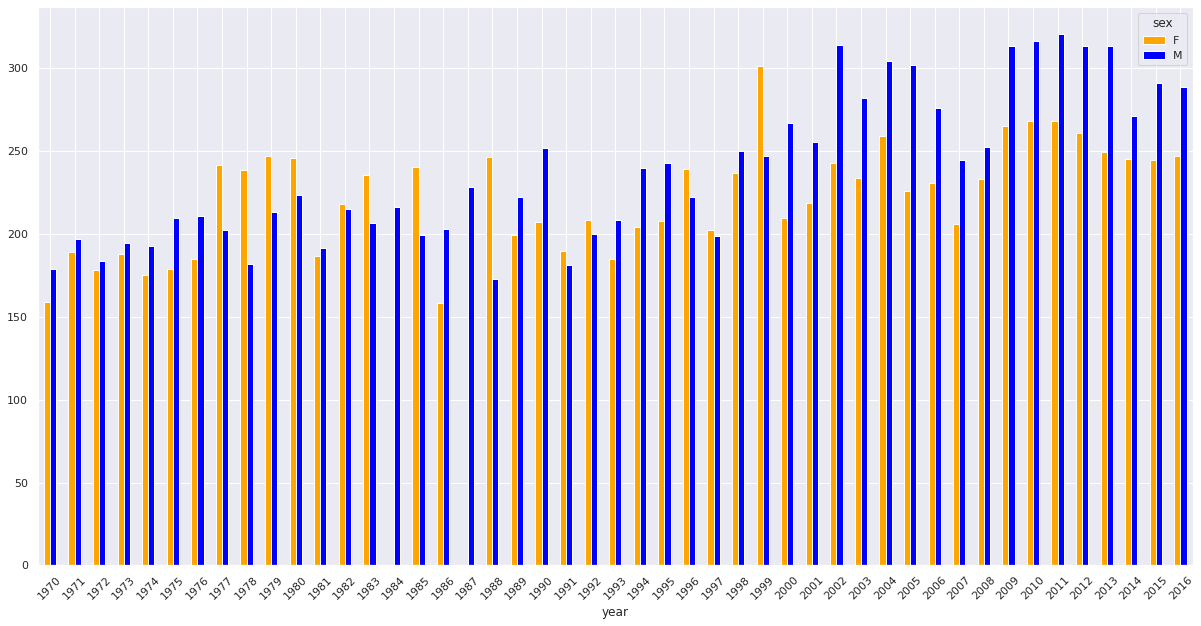

In [6]:
# mean length of songs by gender over time
songlen_sex_year = new_data2.groupby(['year', 'sex']).song_len.mean()

sns.set(rc={'figure.figsize':(20.7,10.27)})
songlen_sex_year.unstack(level=1).plot(kind='bar', color=['orange','blue'])
plt.xticks(rotation=45)

(array([1960., 1970., 1980., 1990., 2000., 2010., 2020.]),
 <a list of 7 Text major ticklabel objects>)

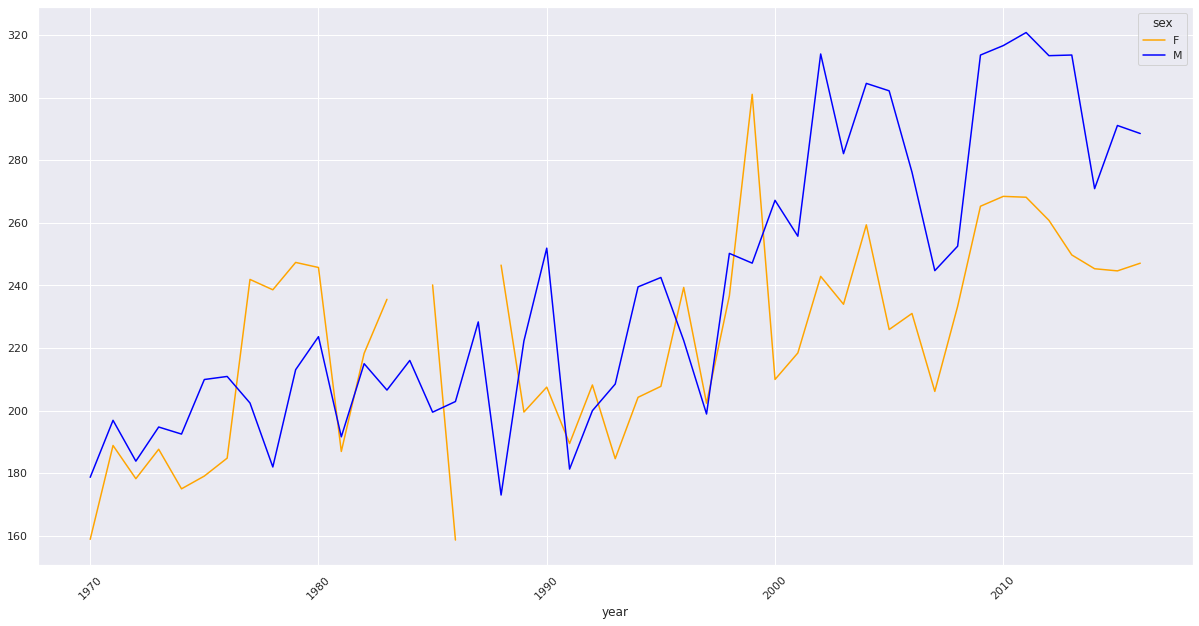

In [7]:
#line plot of the same: mean length of songs by sex over time
sns.set(rc={'figure.figsize':(20.7,10.27)})
songlen_sex_year.unstack(level=1).plot(color=['orange','blue'])
plt.xticks(rotation=45)

In [8]:
#for calculating avg word length, we remove stop words
stop_words = set(line.strip() for line in open('snowball_stopwords.txt'))
len(stop_words)

178

In [9]:
#for calculating avg word length, we remove stop words
#stop_words = set(line.strip() for line in open('snowball_stopwords.txt'))

filtered_lyrics = []   
for song in new_data2['lyrics_tokenized']: 
    filtered_song = []
    for word in song:
        if word not in stop_words: 
            filtered_song.append(word)
    filtered_lyrics.append(filtered_song)

    #add to df
new_data2.insert(7, 'filtered_stopw', value=filtered_lyrics)

In [10]:
#average word length of songs (stopwords removed)
mean_word_len = []
for song in new_data2['filtered_stopw']:
    word_len=[]
    for word in song:
        word_len.append(len(word))
    mean_word_len.append(sum(word_len)/len(song))
#add to df
new_data2.insert(8, 'mean_word_len', value=mean_word_len)

(array([1960., 1970., 1980., 1990., 2000., 2010., 2020.]),
 <a list of 7 Text major ticklabel objects>)

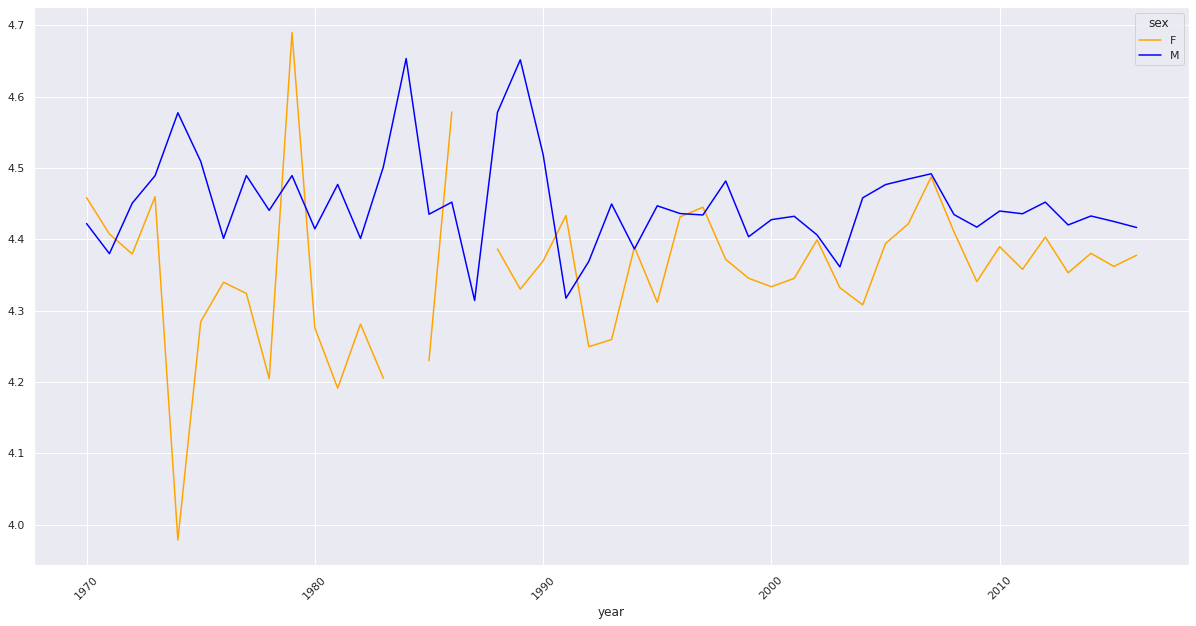

In [11]:
#avg word length for each sex over time
wordlen_sex_year = new_data2.groupby(['year', 'sex']).mean_word_len.mean()

#line plot of avg word length of songs by gender over time
sns.set(rc={'figure.figsize':(20.7,10.27)})
wordlen_sex_year.unstack(level=1).plot(color=['orange','blue'])
plt.xticks(rotation=45)

In [12]:
#vocab for each song - unique words
#1st: lowercase lyrics
vocab_size = []
for song in new_data2['lyrics_tokenized']:
    unique = []
    for word in song:
        if word.lower() not in unique:
            unique.append(word.lower())
    vocab_size.append(len(unique))
#adding to the df
new_data2.insert(8, 'vocab_size', value=vocab_size)
new_data2

,Unnamed: 0,song,year,artist,genre,lyrics_tokenized,song_len,filtered_stopw,vocab_size,mean_word_len,lyrics,sex
0,0,my-elusive-dreams,1970,bobby-vinton,Pop,"[You, followed, me, to, Texas, You, followed, ...",167,"[You, followed, Texas, You, followed, Utah, We...",71,4.558824,"You followed me to Texas,\nYou followed me to ...",M
1,1,baby-i-m-yours,1970,bobby-vinton,Pop,"[Baby, Im, yours, Baby, Im, yours, And, Ill, b...",142,"[Baby, Im, Baby, Im, And, Ill, stars, fall, sk...",64,3.913580,Baby I'm yours\nBaby I'm yours\nAnd I'll be yo...,M
2,2,raindrops-keep-fallin-on-my-head,1970,bobby-vinton,Pop,"[Raindrops, keep, falling, on, my, head, And, ...",179,"[Raindrops, keep, falling, head, And, just, li...",81,4.819820,Raindrops keep falling on my head\nAnd just li...,M
3,3,god-only-knows,1970,beach-boys,Rock,"[I, may, not, always, love, you, But, long, as...",115,"[I, always, love, But, long, stars, You, never...",50,4.220339,I may not always love you\nBut long as there a...,M
4,4,their-hearts-were-full-of-spring,1970,beach-boys,Rock,"[Theres, a, story, told, of, a, very, gentle, ...",102,"[Theres, story, told, gentle, boy, And, girl, ...",64,4.434783,There's a story told of a very gentle boy\nAnd...,M
...,...,...,...,...,...,...,...,...,...,...,...,...
119361,119361,country-ain-t-never-been-pretty,2015,cam,Other,"[Her, high, heels, on, the, red, carpet, Her, ...",378,"[Her, high, heels, red, carpet, Her, perfect, ...",189,4.877729,Her high heels on the red carpet\nHer perfect ...,F
119362,119362,runaway-train,2015,cam,Other,"[I, always, knew, that, you, were, hiding, som...",292,"[I, always, knew, hiding, something, I, always...",116,4.764368,I always knew that you were hiding something f...,F
119363,119363,want-it-all,2015,cam,Other,"[Been, asittin, round, a, coward, broken, all,...",334,"[Been, asittin, round, coward, broken, I, brea...",123,4.076190,"Been a-sittin' 'round a coward, broken all tha...",F
119364,119364,pocket-full-of-keys,2015,dale-ann-bradley,Country,"[He, has, one, that, locks, the, office, And, ...",226,"[He, one, locks, office, And, one, starts, big...",101,4.715385,"He has one that locks the office,\nAnd there's...",F


(array([1960., 1970., 1980., 1990., 2000., 2010., 2020.]),
 <a list of 7 Text major ticklabel objects>)

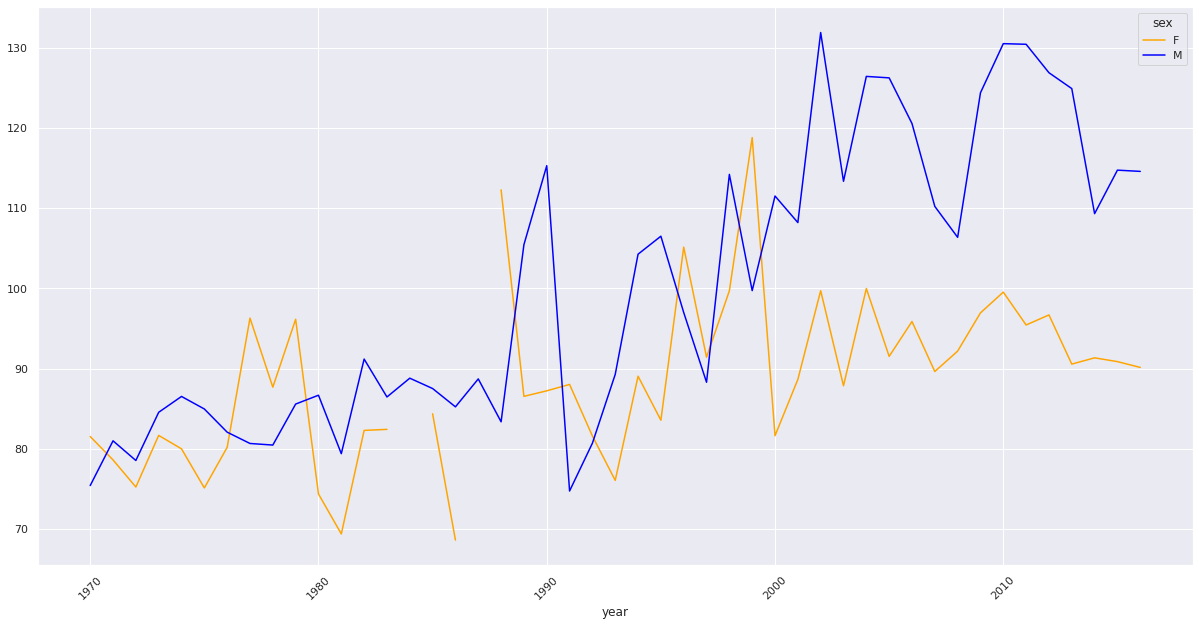

In [13]:
#avg vocab size for each sex over time
vocab_sex_year = new_data2.groupby(['year', 'sex']).vocab_size.mean()

sns.set(rc={'figure.figsize':(20.7,10.27)})
vocab_sex_year.unstack(level=1).plot(color=['orange','blue'])
plt.xticks(rotation=45)

In [14]:
#variety for each song
variety = []
for song in range(0,len(new_data2)):
    variety.append(vocab_size[song]/song_len[song])
#adding to the df
new_data2.insert(9, 'variety', value=variety)
new_data2

,Unnamed: 0,song,year,artist,genre,lyrics_tokenized,song_len,filtered_stopw,vocab_size,variety,mean_word_len,lyrics,sex
0,0,my-elusive-dreams,1970,bobby-vinton,Pop,"[You, followed, me, to, Texas, You, followed, ...",167,"[You, followed, Texas, You, followed, Utah, We...",71,0.425150,4.558824,"You followed me to Texas,\nYou followed me to ...",M
1,1,baby-i-m-yours,1970,bobby-vinton,Pop,"[Baby, Im, yours, Baby, Im, yours, And, Ill, b...",142,"[Baby, Im, Baby, Im, And, Ill, stars, fall, sk...",64,0.450704,3.913580,Baby I'm yours\nBaby I'm yours\nAnd I'll be yo...,M
2,2,raindrops-keep-fallin-on-my-head,1970,bobby-vinton,Pop,"[Raindrops, keep, falling, on, my, head, And, ...",179,"[Raindrops, keep, falling, head, And, just, li...",81,0.452514,4.819820,Raindrops keep falling on my head\nAnd just li...,M
3,3,god-only-knows,1970,beach-boys,Rock,"[I, may, not, always, love, you, But, long, as...",115,"[I, always, love, But, long, stars, You, never...",50,0.434783,4.220339,I may not always love you\nBut long as there a...,M
4,4,their-hearts-were-full-of-spring,1970,beach-boys,Rock,"[Theres, a, story, told, of, a, very, gentle, ...",102,"[Theres, story, told, gentle, boy, And, girl, ...",64,0.627451,4.434783,There's a story told of a very gentle boy\nAnd...,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119361,119361,country-ain-t-never-been-pretty,2015,cam,Other,"[Her, high, heels, on, the, red, carpet, Her, ...",378,"[Her, high, heels, red, carpet, Her, perfect, ...",189,0.500000,4.877729,Her high heels on the red carpet\nHer perfect ...,F
119362,119362,runaway-train,2015,cam,Other,"[I, always, knew, that, you, were, hiding, som...",292,"[I, always, knew, hiding, something, I, always...",116,0.397260,4.764368,I always knew that you were hiding something f...,F
119363,119363,want-it-all,2015,cam,Other,"[Been, asittin, round, a, coward, broken, all,...",334,"[Been, asittin, round, coward, broken, I, brea...",123,0.368263,4.076190,"Been a-sittin' 'round a coward, broken all tha...",F
119364,119364,pocket-full-of-keys,2015,dale-ann-bradley,Country,"[He, has, one, that, locks, the, office, And, ...",226,"[He, one, locks, office, And, one, starts, big...",101,0.446903,4.715385,"He has one that locks the office,\nAnd there's...",F


(array([1960., 1970., 1980., 1990., 2000., 2010., 2020.]),
 <a list of 7 Text major ticklabel objects>)

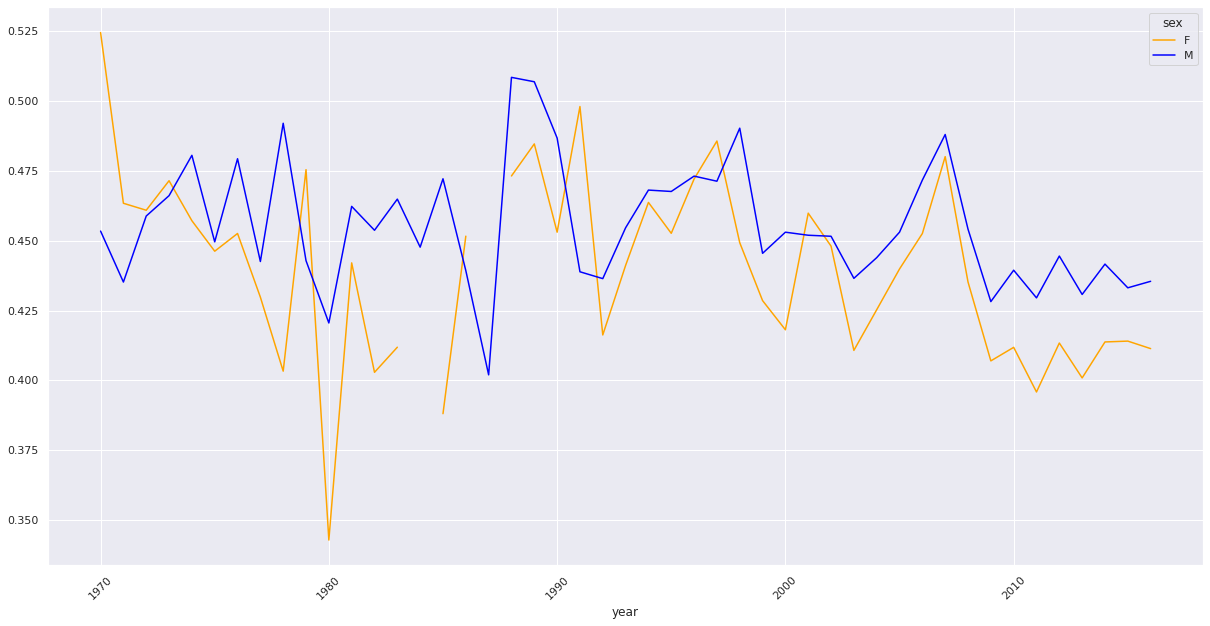

In [15]:
#variety for each sex over time
variety_sex_year = new_data2.groupby(['year', 'sex']).variety.mean()

sns.set(rc={'figure.figsize':(20.7,10.27)})
variety_sex_year.unstack(level=1).plot(color=['orange','blue'])
plt.xticks(rotation=45)

In [16]:
#transforming data for R model fitting
datforR = new_data2.drop(['lyrics', 'lyrics_tokenized', 'filtered_stopw'], axis=1)
datforR['sex'] = datforR['sex'].str.replace('M', '0')
datforR['sex'] = datforR['sex'].str.replace('F', '1')
datforR = datforR.drop('Unnamed: 0', axis=1)

,Unnamed: 0,song,year,artist,genre,song_len,vocab_size,variety,mean_word_len,sex
0,0,my-elusive-dreams,1970,bobby-vinton,Pop,167,71,0.425150,4.558824,0
1,1,baby-i-m-yours,1970,bobby-vinton,Pop,142,64,0.450704,3.913580,0
2,2,raindrops-keep-fallin-on-my-head,1970,bobby-vinton,Pop,179,81,0.452514,4.819820,0
3,3,god-only-knows,1970,beach-boys,Rock,115,50,0.434783,4.220339,0
4,4,their-hearts-were-full-of-spring,1970,beach-boys,Rock,102,64,0.627451,4.434783,0
...,...,...,...,...,...,...,...,...,...,...
119361,119361,country-ain-t-never-been-pretty,2015,cam,Other,378,189,0.500000,4.877729,1
119362,119362,runaway-train,2015,cam,Other,292,116,0.397260,4.764368,1
119363,119363,want-it-all,2015,cam,Other,334,123,0.368263,4.076190,1
119364,119364,pocket-full-of-keys,2015,dale-ann-bradley,Country,226,101,0.446903,4.715385,1


In [19]:
datforR.to_csv('datforR.csv')